# Preparation

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Dataset

In [3]:
Diabetes_df=pd.read_csv('./Data/diabetes_prediction_dataset.csv')
Diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# EDA (Exploratory Data Analysis)

## Data Understanding

In [ ]:
Diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
Diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
Diabetes_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
Duplicate=Diabetes_df.duplicated().sum()
print("Duplicate Data in dataframe:", Duplicate)

Duplicate Data in dataframe: 3854


In [ ]:
row, column=Diabetes_df.shape
print("Row of Dataset:", row)
print("Column of Dataset:", column)

Row of Dataset: 100000
Column of Dataset: 9


## Visualization

### Visualization of Patient's Gender

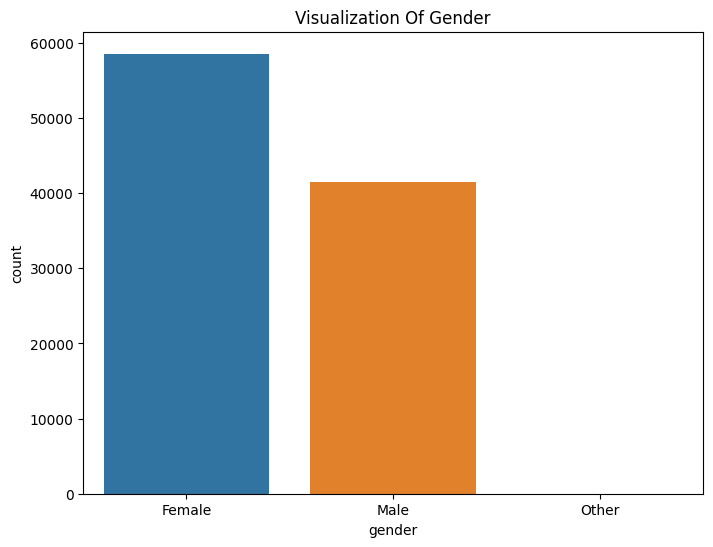

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='gender')
plt.title('Visualization Of Gender')
plt.show()

### Visualization Of Patient's Smoking History

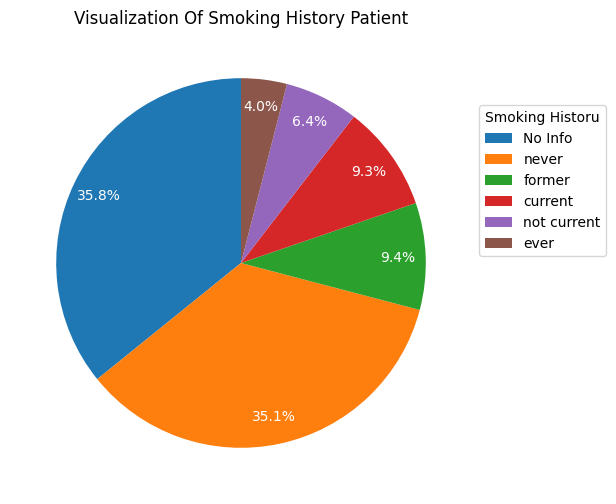

In [ ]:
count_smoking= Diabetes_df['smoking_history'].value_counts()

plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_smoking.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'color':'white'}
)
plt.title('Visualization Of Smoking History Patient')
plt.legend(wedges, count_smoking.index, title="Smoking Historu", loc="lower left", bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Patient's Hypertension Status

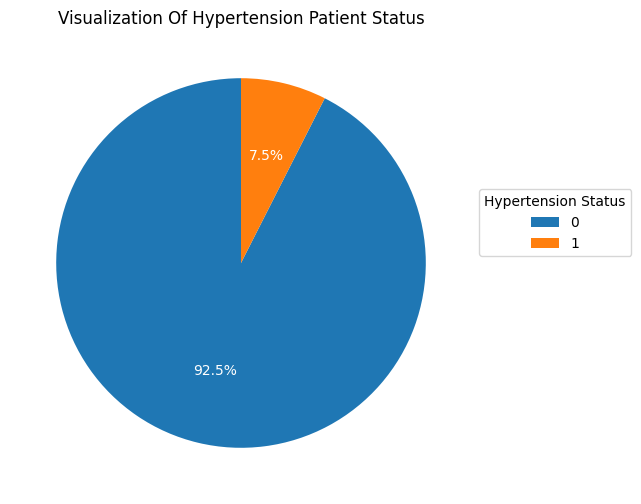

In [ ]:
count_hypertension=Diabetes_df['hypertension'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_hypertension.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'color':'white'}
)

plt.title('Visualization Of Hypertension Patient Status')
plt.legend(wedges, count_hypertension.index, title="Hypertension Status", loc="lower left", bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Patient's Heart Disease status

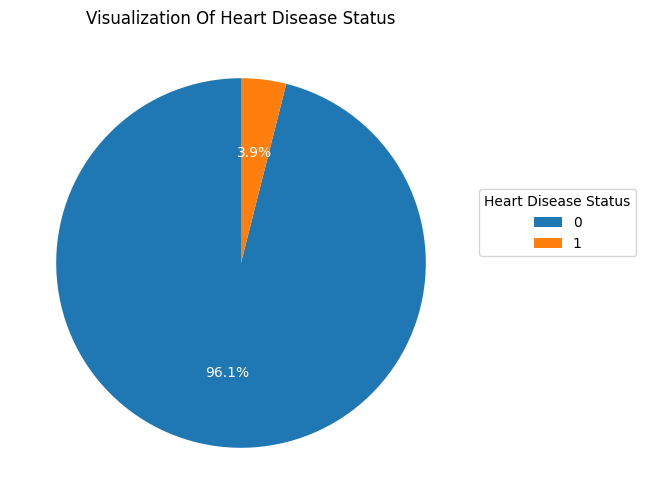

In [ ]:
count_heart_disease=Diabetes_df['heart_disease'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_heart_disease.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'color':'white'}
)

plt.title('Visualization Of Heart Disease Status')
plt.legend(wedges, count_heart_disease.index, title="Heart Disease Status", loc="lower left", bbox_to_anchor=((1,0.5)))
plt.show()

### Visualization of Patient's Diabetes Status

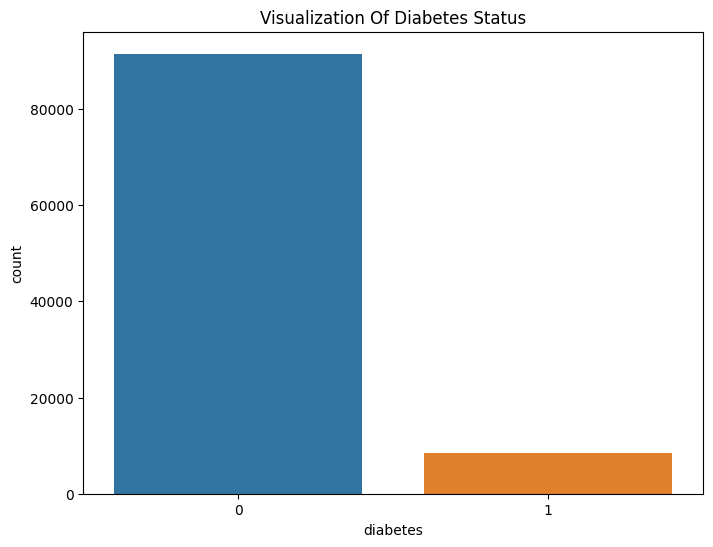

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='diabetes')
plt.title("Visualization Of Diabetes Status")
plt.show()

### Visualization of Numeric Distribution Data

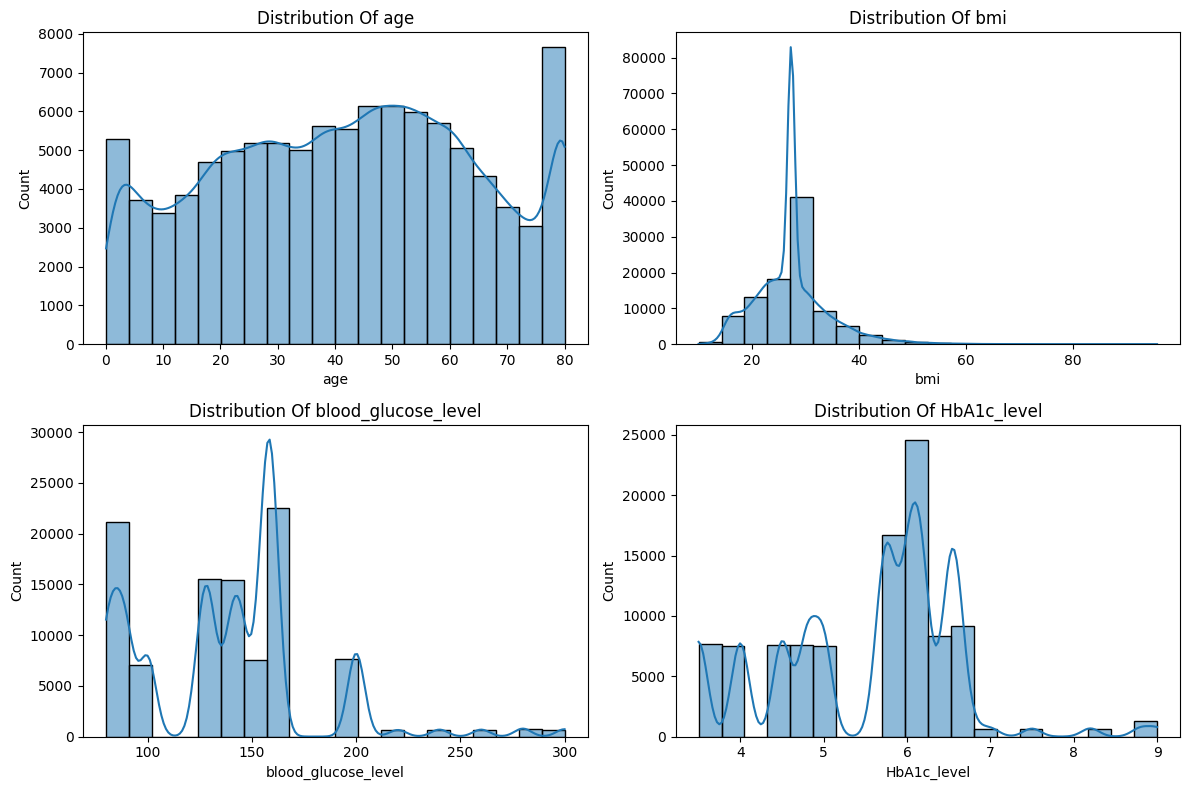

In [ ]:
num_cat=['age', 'bmi','blood_glucose_level','HbA1c_level']

fig, axs=plt.subplots(2,2 ,figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(num_cat):
    sns.histplot(Diabetes_df[col], bins=20, kde=True, edgecolor='black', ax=axs[i])
    axs[i].set_title(f'Distribution Of {col}')
    axs[i].set_xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Visualization of Numerical Boxplot of The Data

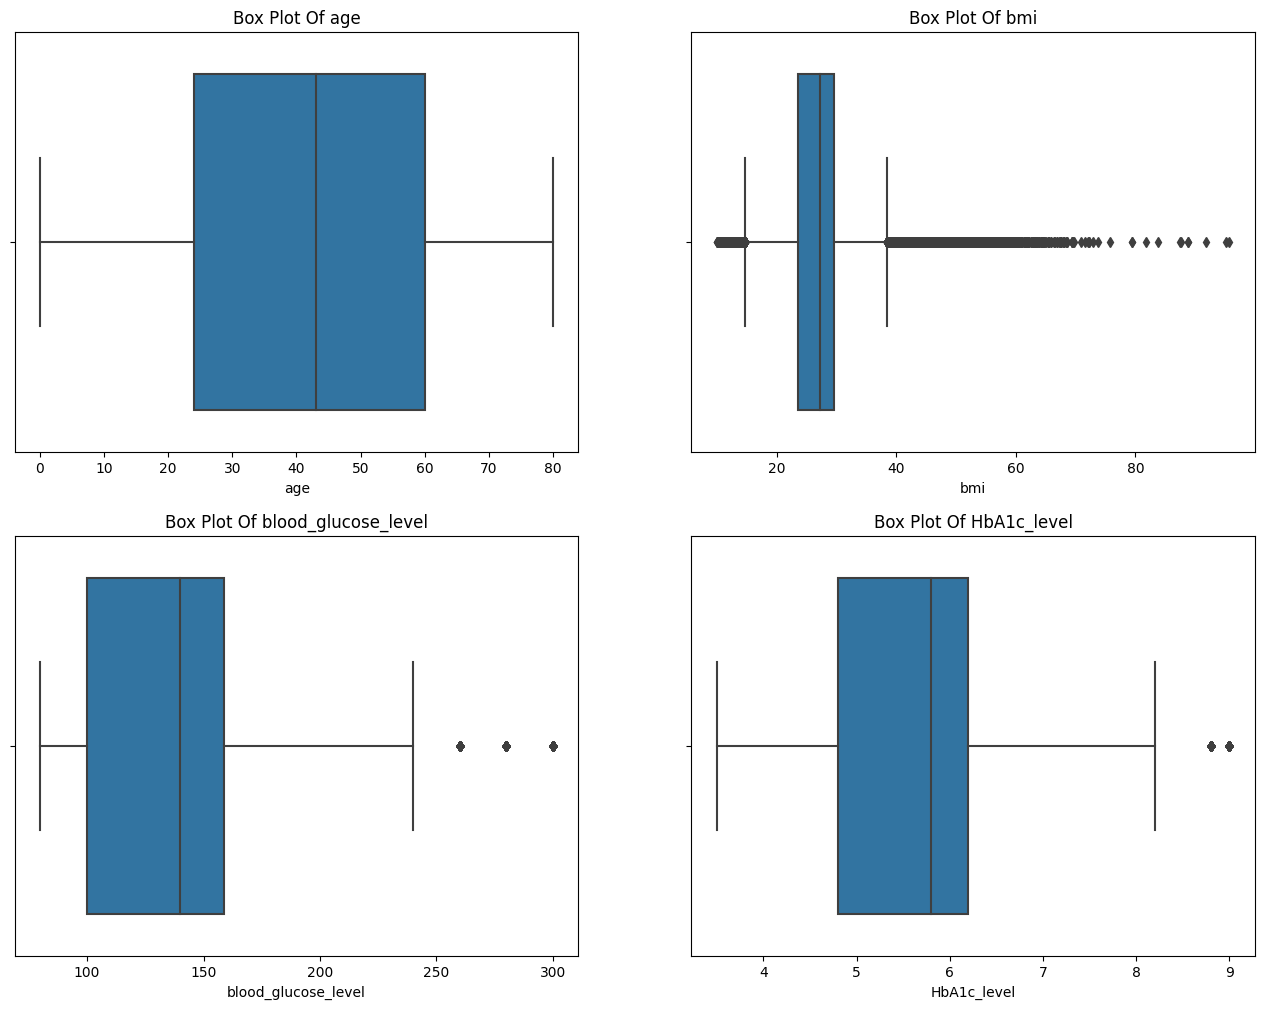

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(16,12))
axs=axs.flatten()
for i, col in enumerate(num_cat):
    sns.boxplot(data=Diabetes_df, x=col, ax=axs[i])
    axs[i].set_title(f'Box Plot Of {col}')
    axs[i].set_xlabel(col)

plt.show()
plt.tight_layout()

### Visualization of Diabetes Status vs Medical Data

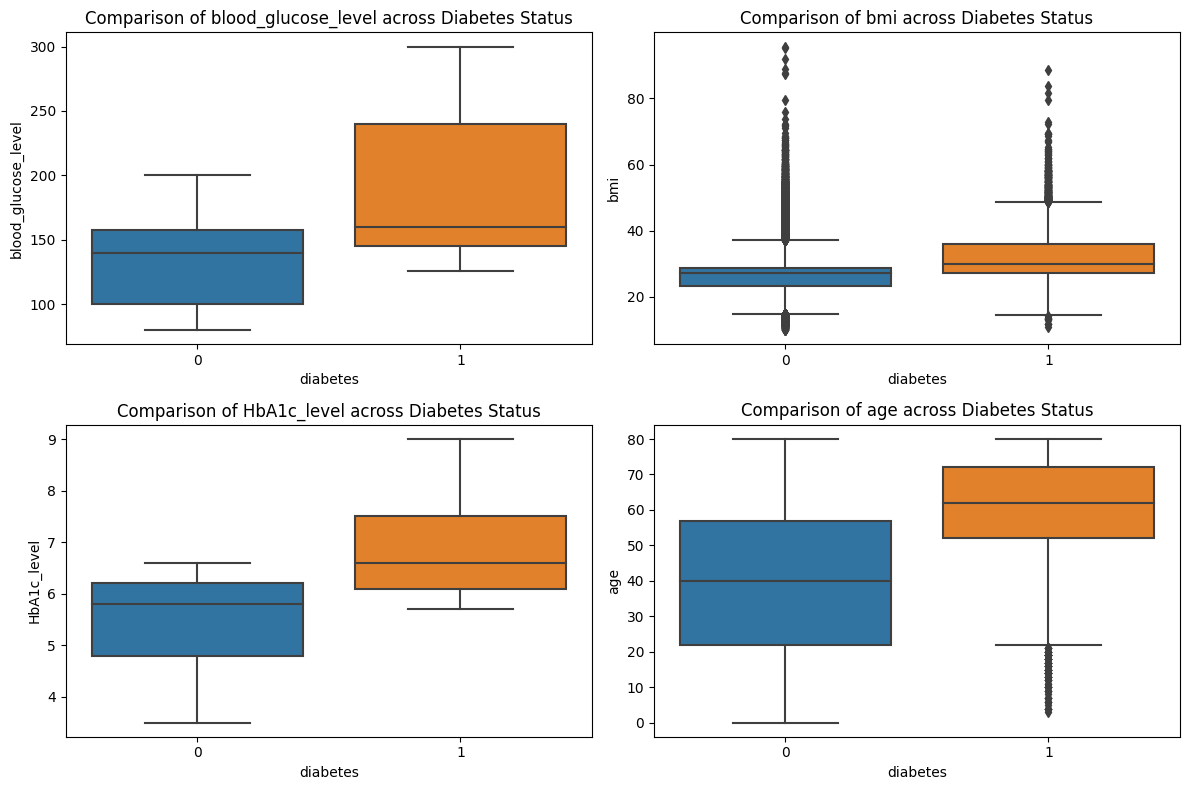

In [ ]:
glucose=['blood_glucose_level','bmi','HbA1c_level','age']

fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()
for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='diabetes', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison of {col} across Diabetes Status')

plt.tight_layout()
plt.show()

### Visualization Of Hypertension Status VS Medical Data

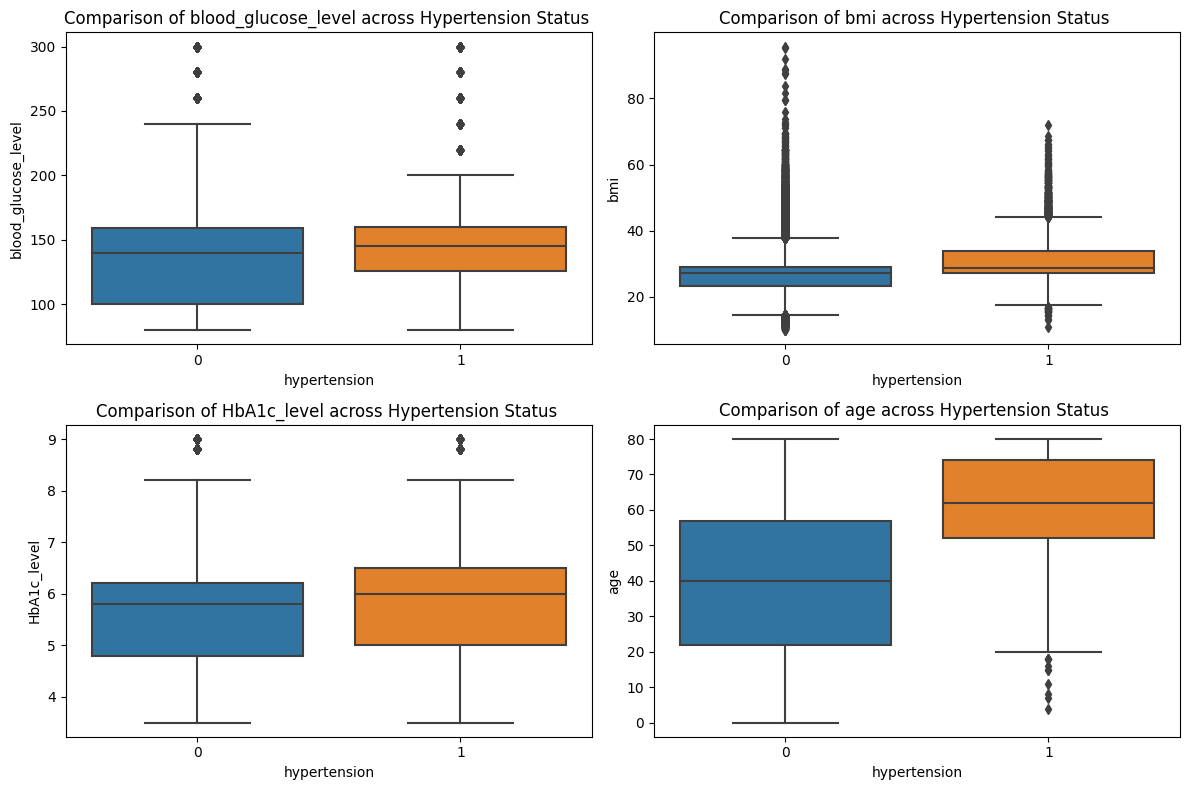

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='hypertension', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison of {col} across Hypertension Status ')

plt.tight_layout()
plt.show()


### Visualization of Heart Disease Status VS Medical Data

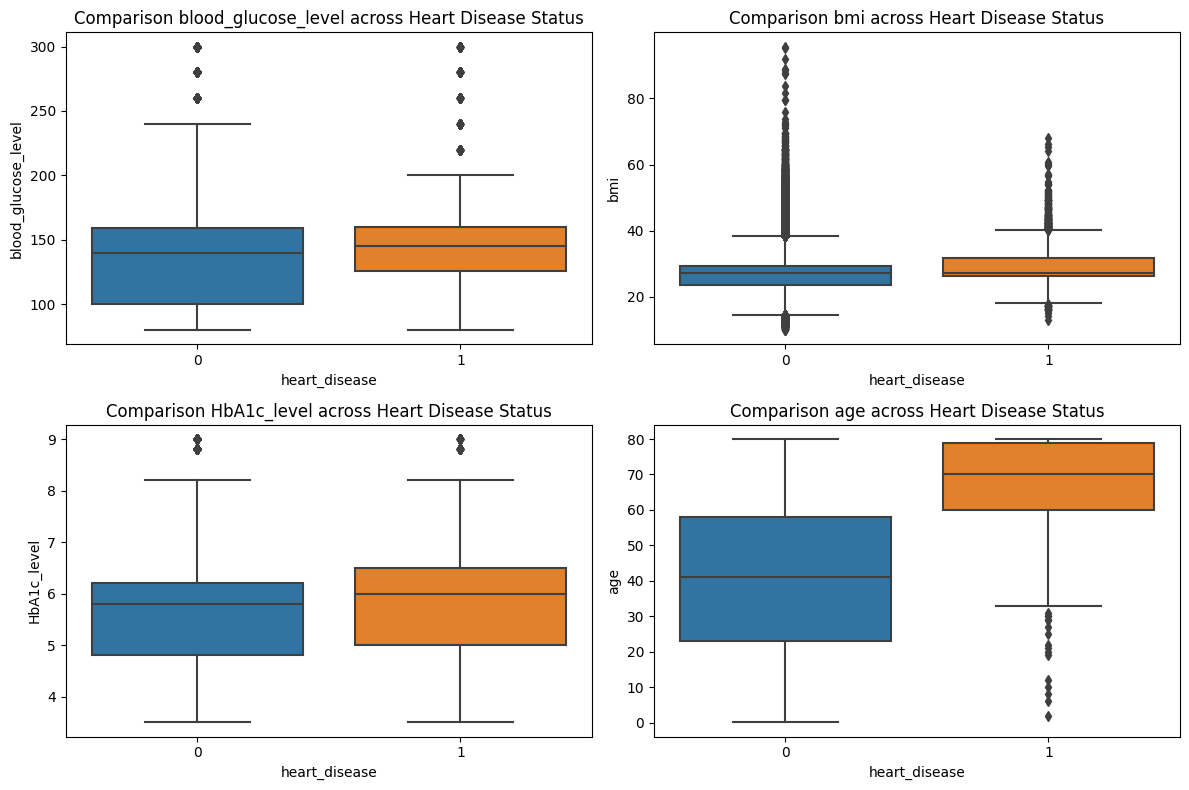

In [ ]:
fig, axs=plt.subplots(2,2 , figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='heart_disease', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison {col} across Heart Disease Status')

plt.tight_layout()
plt.show()

### Visualization of Smoking History VS Gender

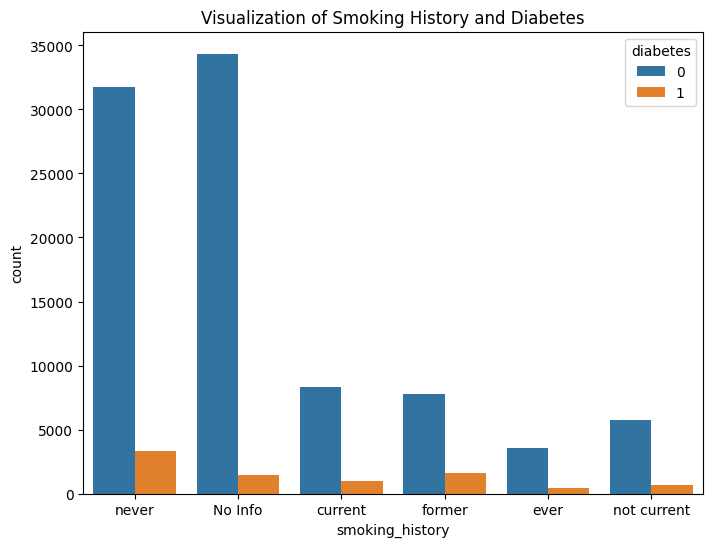

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='smoking_history', hue='diabetes')
plt.title('Visualization of Smoking History and Diabetes')
plt.show()

### Visualization of Diabetes Status VS Hypertension Status

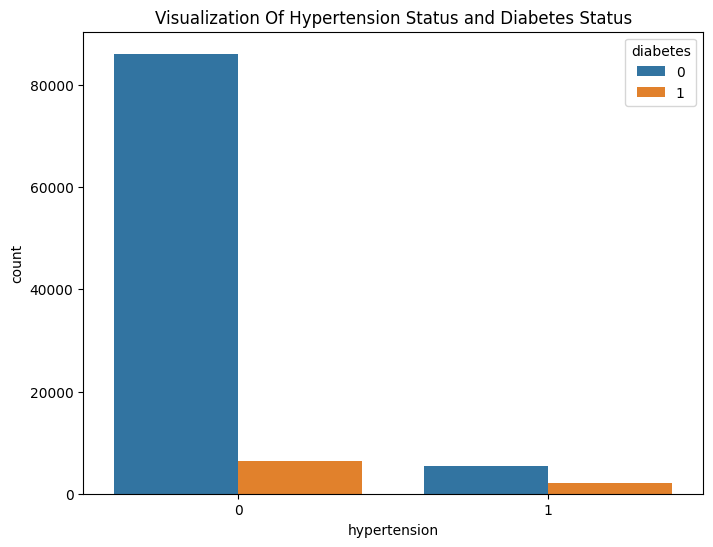

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='hypertension', hue='diabetes')
plt.title('Visualization Of Hypertension Status and Diabetes Status')
plt.show()

### Visualization of Heart Disease Status VS Diabetes Status

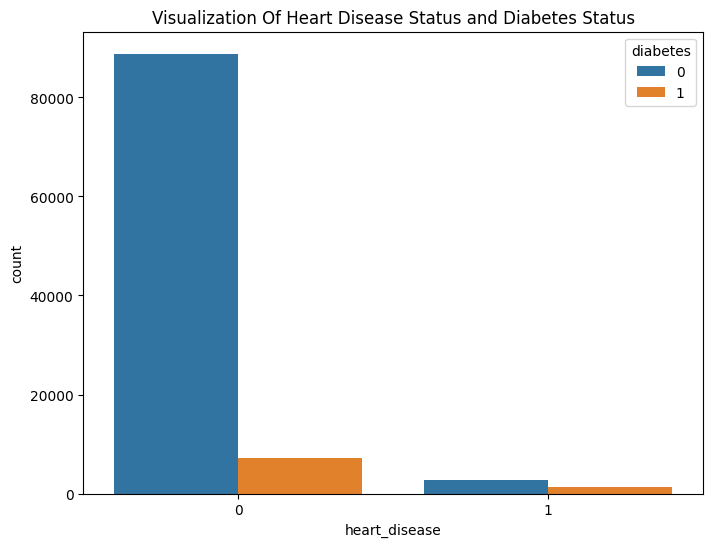

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='heart_disease', hue='diabetes')
plt.title('Visualization Of Heart Disease Status and Diabetes Status')
plt.show()

### Heatmap of Medical Data

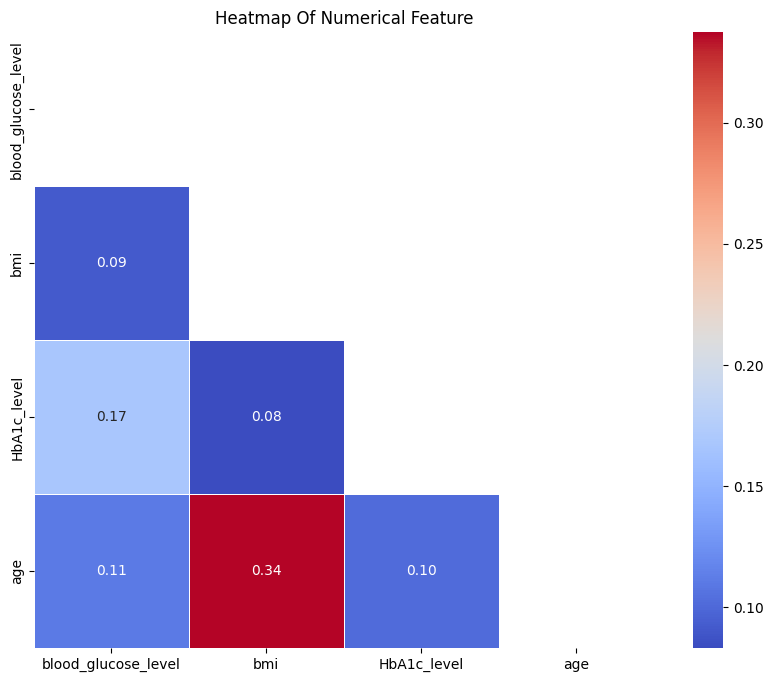

In [ ]:
num_column=Diabetes_df[['blood_glucose_level','bmi','HbA1c_level','age']]
corr_num=num_column.corr()
mask=np.triu(np.ones_like(corr_num, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr_num, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, fmt='.2f' )
plt.title('Heatmap Of Numerical Feature')
plt.show()

# Preprocessing

## Mismatch Data Handling

In [ ]:
Diabetes_df[Diabetes_df.age <1].age.value_counts()

age
0.72    104
0.80    102
0.64     99
0.56     96
0.88     90
0.32     89
0.24     87
0.48     83
0.40     66
0.16     59
0.08     36
Name: count, dtype: int64

In [ ]:
Diabetes_df.loc[Diabetes_df.age <1, 'age']=Diabetes_df.loc[Diabetes_df.age <1, 'age'] *100

In [ ]:
Diabetes_df[Diabetes_df.age <1].age.value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
Diabetes_df=Diabetes_df.drop_duplicates()

In [ ]:
Diabetes_df.shape

(96121, 9)

In [ ]:
Diabetes_df=Diabetes_df[Diabetes_df['gender'] !='Other']

## Duplicate Data Handling

In [ ]:
Duplicate=Diabetes_df.duplicated().sum()
print("Duplicate Data In Dataframe:", Duplicate)

Duplicate Data In Dataframe: 0


## Outlier Handling

In [ ]:
def outlier_handling(df, columns):
    df_cleaned=df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            Q1=df_cleaned[col].quantile(0.25)
            Q3=df_cleaned[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1- 1.5 * IQR
            upper_bound= Q3 + 1.5 * IQR
            df_cleaned=df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    df_cleaned=df_cleaned.reset_index(drop=True)
    return df_cleaned

Diabetes_df=outlier_handling(Diabetes_df, columns=['blood_glucose_level','bmi','age','HbA1c_level'])

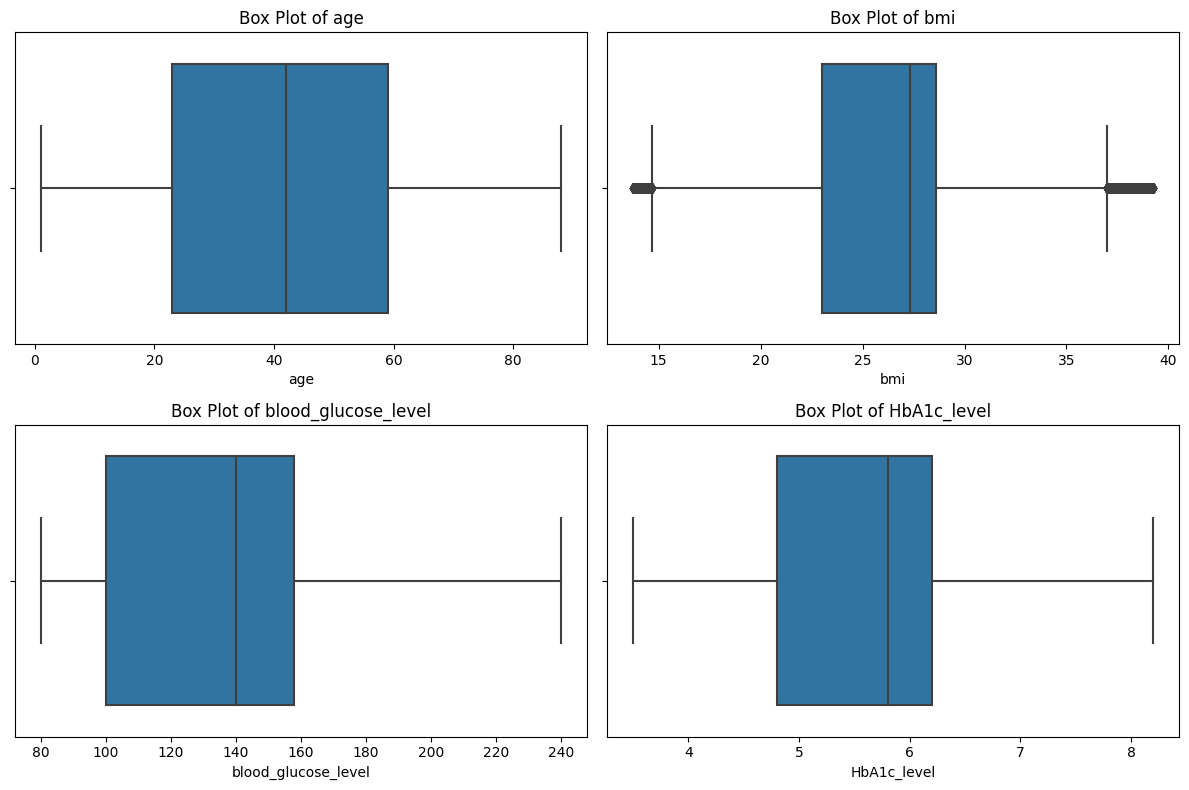

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(num_cat):
    sns.boxplot(data=Diabetes_df, x=Diabetes_df[col], ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

## Encode

In [ ]:
gender_encode={
    'Male':0,
    'Female':1
}
smoking_encode={
    'never':0,
    'not current':1,
    'former':2,
    'current':3,
    'ever':4,
    'No Info':5
}
Diabetes_df['gender']=Diabetes_df['gender'].map(gender_encode)
Diabetes_df['smoking_history']=Diabetes_df['smoking_history'].map(smoking_encode)
Diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,5,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,3,23.45,5.0,155,0
4,0,76.0,1,1,3,20.14,4.8,155,0


## Train and Test Data Split

In [ ]:
X=Diabetes_df.drop('diabetes', axis=1)
y=Diabetes_df['diabetes']

X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(f'Training Data Shape: X_train {X_train.shape}, y_train{y_train.shape}')
print(f'Testing Data Shape: X_test {X_test.shape}, y_test {y_test.shape}')

Training Data Shape: X_train (70306, 8), y_train(70306,)
Testing Data Shape: X_test (17577, 8), y_test (17577,)


## Oversample

In [ ]:
train_df=X_train.copy()
train_df['diabetes']=y_train

diabetes_majority=train_df[train_df['diabetes']==0]
diabetes_minority=train_df[train_df['diabetes']==1]

diabetes_oversample_minority=resample(
    diabetes_minority,
    replace=True,
    n_samples=len(diabetes_majority),
    random_state=42
)
train_balanced=pd.concat([diabetes_majority,diabetes_oversample_minority])
train_balanced=train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X_train=train_balanced.drop(columns='diabetes',axis=1)
y_train=train_balanced['diabetes']
y_train.value_counts()

diabetes
0    66636
1    66636
Name: count, dtype: int64

# Modelling

## Random Forest

### Score Metric

In [ ]:
Rf=RandomForestClassifier().fit(X_train, y_train)
eval_train_rf=Rf.predict(X_train)
eval_test_rf=Rf.predict(X_test)

acc_rf=accuracy_score(y_test, eval_test_rf)
precision_rf=precision_score(y_test, eval_test_rf)
recall_rf=recall_score(y_test, eval_test_rf)
f1_rf=f1_score(y_test, eval_test_rf)

In [ ]:
result_df=({
    "Accuracy":[acc_rf],
    "Precisious":[precision_rf],
    "Recall":[recall_rf],
    "F1 Score":[f1_rf]
})
result_df=pd.DataFrame(result_df, index=['Random Forest'])
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.965296,0.716547,0.546652,0.620174


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_train_rf))

print('='*50)
print('Test Data')
print(classification_report(y_test, eval_test_rf))

Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66636
           1       1.00      1.00      1.00     66636

    accuracy                           1.00    133272
   macro avg       1.00      1.00      1.00    133272
weighted avg       1.00      1.00      1.00    133272

Test Data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16666
           1       0.72      0.55      0.62       911

    accuracy                           0.97     17577
   macro avg       0.85      0.77      0.80     17577
weighted avg       0.96      0.97      0.96     17577



### Confusion Matrix

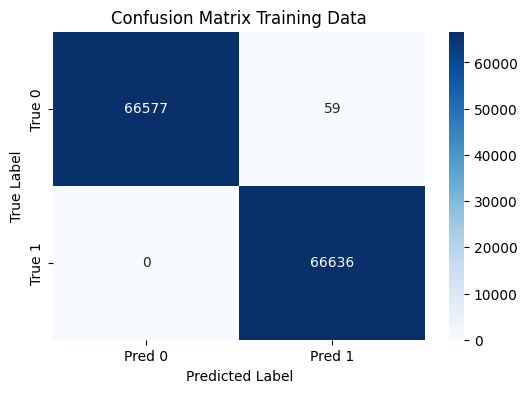

In [ ]:
cm_train_rf=confusion_matrix(y_train, eval_train_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

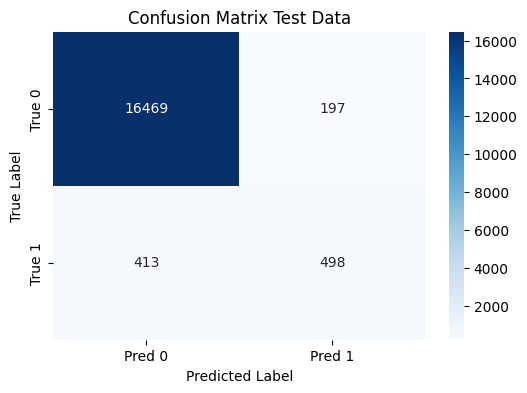

In [ ]:
cm_test=confusion_matrix(y_test, eval_test_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Logistic Regression

### Score Metric

In [ ]:
Lg=LogisticRegression(max_iter=1000).fit(X_train, y_train)
eval_train_lg=Lg.predict(X_train)
eval_test_lg=Lg.predict(X_test)

acc_lg=accuracy_score(y_test, eval_test_lg)
precision_lg=precision_score(y_test, eval_test_lg)
recall_lg=recall_score(y_test, eval_test_lg)
f1_lg=f1_score(y_test, eval_test_lg)

In [ ]:
result_df.loc['Logistic Regression']=[acc_lg, precision_lg, recall_lg, f1_lg]
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.965296,0.716547,0.546652,0.620174
Logistic Regression,0.844456,0.232148,0.867179,0.366249


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(eval_train_lg, y_train))
print('='*50)
print('Test Data')
print(classification_report(eval_test_lg, y_test))

Training Data
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     64745
           1       0.87      0.85      0.86     68527

    accuracy                           0.86    133272
   macro avg       0.86      0.86      0.86    133272
weighted avg       0.86      0.86      0.86    133272

Test Data
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     14174
           1       0.87      0.23      0.37      3403

    accuracy                           0.84     17577
   macro avg       0.86      0.61      0.64     17577
weighted avg       0.85      0.84      0.81     17577



### Confusion Matrix

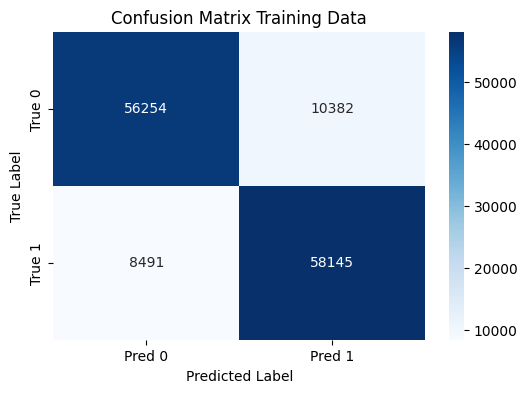

In [ ]:
cm_train_lg=confusion_matrix(y_train, eval_train_lg)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_lg, annot=True, fmt='d', cmap='Blues',xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

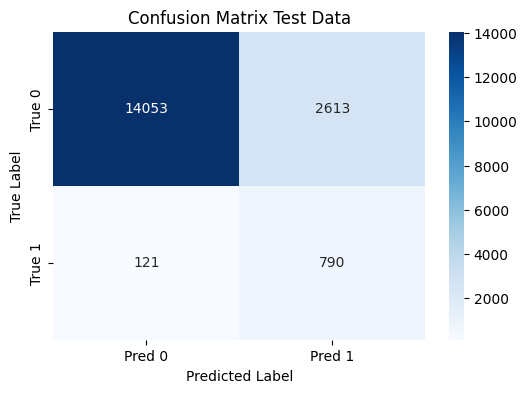

In [ ]:
cm_test_lg=confusion_matrix(y_test, eval_test_lg)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Decision Tree

### Score Metric

In [ ]:
Dt=DecisionTreeClassifier().fit(X_train, y_train)
eval_train_dt=Dt.predict(X_train)
eval_test_dt=Dt.predict(X_test)

acc_dt=precision_score(y_test, eval_test_dt)
precision_dt=precision_score(y_test, eval_test_dt)
recall_dt=recall_score(y_test, eval_test_dt)
f1_dt=f1_score(y_test, eval_test_dt)

In [ ]:
result_df.loc['Decision Tree']=[acc_dt, precision_dt, recall_dt, f1_dt]
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.965296,0.716547,0.546652,0.620174
Logistic Regression,0.844456,0.232148,0.867179,0.366249
Decision Tree,0.560510,0.560510,0.579583,0.569887


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_train_dt))

print('='*50)

print('Test Data')
print(classification_report(y_test, eval_test_dt))

Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66636
           1       1.00      1.00      1.00     66636

    accuracy                           1.00    133272
   macro avg       1.00      1.00      1.00    133272
weighted avg       1.00      1.00      1.00    133272

Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16666
           1       0.56      0.58      0.57       911

    accuracy                           0.95     17577
   macro avg       0.77      0.78      0.77     17577
weighted avg       0.96      0.95      0.96     17577



### Confusion Matrix

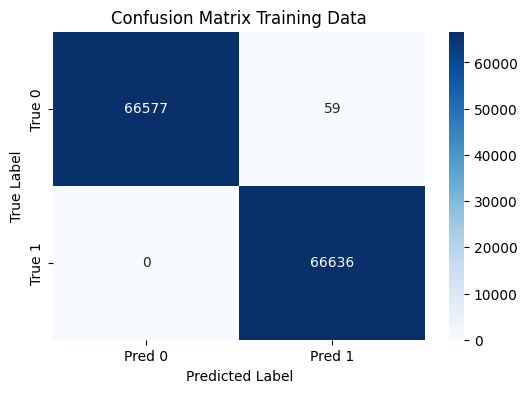

In [ ]:
cm_train_dt=confusion_matrix(y_train, eval_train_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_dt,annot=True,  fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

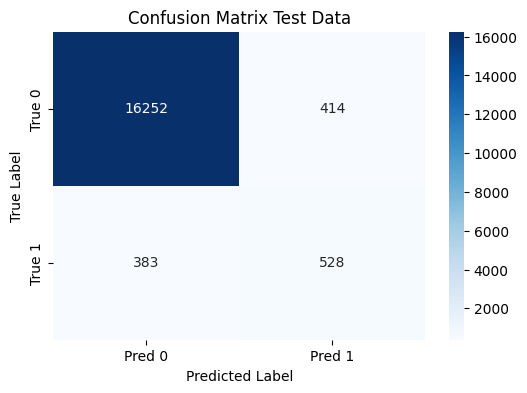

In [ ]:
cm_test_dt=confusion_matrix(y_test, eval_test_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## SVM

### Score Metric

In [ ]:
svm=SVC().fit(X_train, y_train)
eval_train_svm=svm.predict(X_train)
eval_test_svm=svm.predict(X_test)

acc_svm=accuracy_score(y_test, eval_test_svm)
precision_svm=precision_score(y_test, eval_test_svm)
recall_svm=recall_score(y_test, eval_test_svm)
f1_svm=f1_score(y_test, eval_test_svm)


In [ ]:
result_df.loc['SVM']=[acc_svm, precision_svm, recall_svm, f1_svm]
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.965296,0.716547,0.546652,0.620174
Logistic Regression,0.844456,0.232148,0.867179,0.366249
Decision Tree,0.560510,0.560510,0.579583,0.569887
SVM,0.821187,0.215741,0.929748,0.350217


### Classification Metrix

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_train_svm))

print('='*50)

print('Test Data')
print(classification_report(y_test, eval_test_svm))

Training Data
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     66636
           1       0.83      0.93      0.88     66636

    accuracy                           0.87    133272
   macro avg       0.88      0.87      0.87    133272
weighted avg       0.88      0.87      0.87    133272

Test Data
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     16666
           1       0.22      0.93      0.35       911

    accuracy                           0.82     17577
   macro avg       0.61      0.87      0.62     17577
weighted avg       0.95      0.82      0.87     17577



### Confusion Matrix

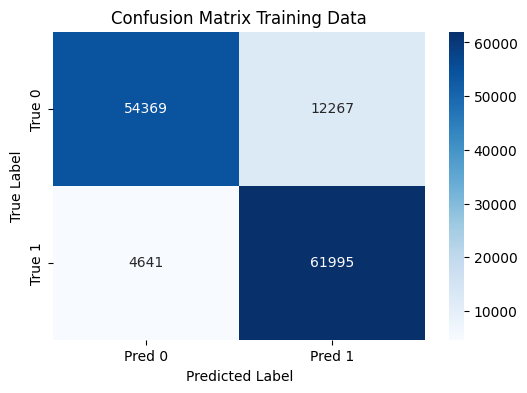

In [ ]:
cm_train_svm=confusion_matrix(y_train, eval_train_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

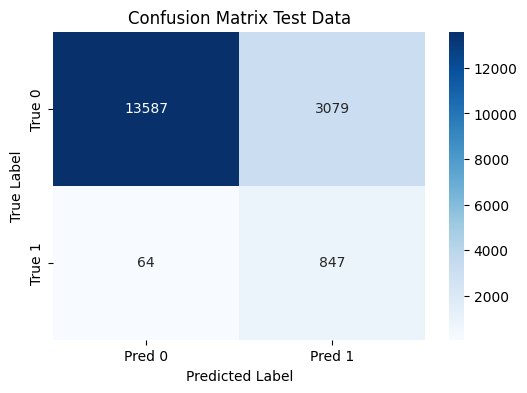

In [ ]:
cm_test_svm=confusion_matrix(y_test, eval_test_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_svm, annot=True, fmt='d',cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

# Hypertune Parameter

## Random Forest Hypertune Parameter

In [ ]:
rf_params={
    'n_estimators':[100,200],
    'max_depth':[3,5],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[3,5],
    'min_samples_split':[3,5]
}
rf_grid=GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=3,
    scoring='roc_auc'
)
rf_grid.fit(X_train, y_train)
print('Random Forest Best Params',rf_grid.best_params_)

Random Forest Best Params {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}


## Decision Tree Hypertune Parameter

In [ ]:
dt_params={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,10],
    'min_samples_split': [3,5,10],
    'min_samples_leaf':[1,2,5],
}
dt_grid=GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dt_params,
    cv=5,
    scoring='roc_auc'
)
dt_grid.fit(X_train, y_train)
print('Decision Tree  Best Params',dt_grid.best_params_)

Decision Tree  Best Params {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}


## Random Forest (After Hypertune Parameter)

### Score Metric

In [ ]:
Rf=RandomForestClassifier(criterion='entropy',max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200).fit(X_train, y_train)
eval_train_rf1=Rf.predict(X_train)
eval_test_rf1=Rf.predict(X_test)

acc_rf_hp=accuracy_score(y_test, eval_test_rf1)
precision_rf_hp=precision_score(y_test, eval_test_rf1)
recall_rf_hp=recall_score(y_test, eval_test_rf1)
f1_rf_hp=f1_score(y_test, eval_test_rf1)

In [ ]:
result_df.loc['Random Forest (After Hypertune Parameter)']=[acc_rf_hp, precision_rf_hp, recall_rf_hp, f1_rf_hp]
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.965296,0.716547,0.546652,0.620174
Logistic Regression,0.844456,0.232148,0.867179,0.366249
Decision Tree,0.560510,0.560510,0.579583,0.569887
SVM,0.821187,0.215741,0.929748,0.350217
Random Forest (After Hypertune Parameter),0.812425,0.210718,0.953897,0.345184


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_train_rf1))

print('='*50)
print('Test Data')
print(classification_report(y_test, eval_test_rf1))

Training Data
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     66636
           1       0.83      0.95      0.89     66636

    accuracy                           0.88    133272
   macro avg       0.89      0.88      0.88    133272
weighted avg       0.89      0.88      0.88    133272

Test Data
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     16666
           1       0.21      0.95      0.35       911

    accuracy                           0.81     17577
   macro avg       0.60      0.88      0.62     17577
weighted avg       0.96      0.81      0.86     17577



### Confusion Matrix

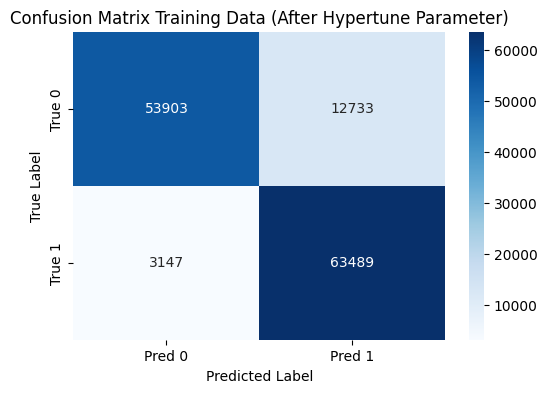

In [ ]:
cm_train_rf=confusion_matrix(y_train, eval_train_rf1)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data (After Hypertune Parameter)')
plt.show()

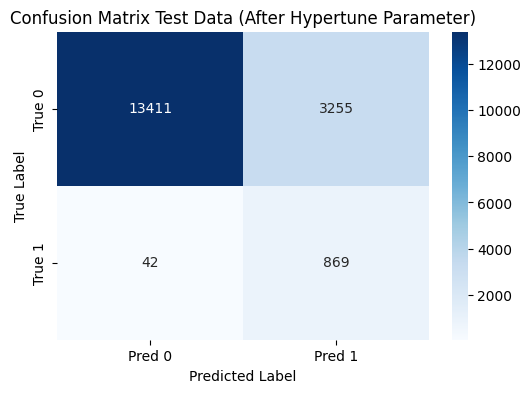

In [ ]:
cm_test_rf=confusion_matrix(y_test, eval_test_rf1)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues',xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data (After Hypertune Parameter)')
plt.show()

## Decision Tree (After Hypertune Parameter)

### Score Metric

In [ ]:
Dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 5).fit(X_train, y_train)
eval_train_dt1=Dt.predict(X_train)
eval_test_dt1=Dt.predict(X_test)

acc_dt_hp=precision_score(y_test, eval_test_dt1)
precision_dt_hp=precision_score(y_test, eval_test_dt1)
recall_dt_hp=recall_score(y_test, eval_test_dt1)
f1_dt_hp=f1_score(y_test, eval_test_dt1)

In [ ]:
result_df.loc['Decision Tree (After Hypertune Parameter)']=[acc_dt_hp, precision_dt_hp, recall_dt_hp, f1_dt_hp]
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.965296,0.716547,0.546652,0.620174
Logistic Regression,0.844456,0.232148,0.867179,0.366249
Decision Tree,0.560510,0.560510,0.579583,0.569887
SVM,0.821187,0.215741,0.929748,0.350217
Random Forest (After Hypertune Parameter),0.812425,0.210718,0.953897,0.345184
Decision Tree (After Hypertune Parameter),0.237948,0.237948,0.926454,0.378645


### Classification Report

In [ ]:
print('Training Data')
print(classification_report(y_train, eval_train_dt1))

print('='*50)

print('Test Data')
print(classification_report(y_test, eval_test_dt1))

Training Data
              precision    recall  f1-score   support

           0       0.93      0.84      0.89     66636
           1       0.86      0.94      0.90     66636

    accuracy                           0.89    133272
   macro avg       0.90      0.89      0.89    133272
weighted avg       0.90      0.89      0.89    133272

Test Data
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     16666
           1       0.24      0.93      0.38       911

    accuracy                           0.84     17577
   macro avg       0.62      0.88      0.64     17577
weighted avg       0.96      0.84      0.88     17577



### Confusion Matrix

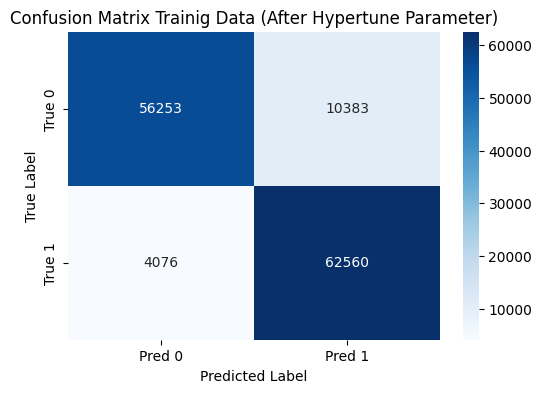

In [ ]:
cm_train_dt=confusion_matrix(y_train, eval_train_dt1)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Trainig Data (After Hypertune Parameter)')
plt.show()

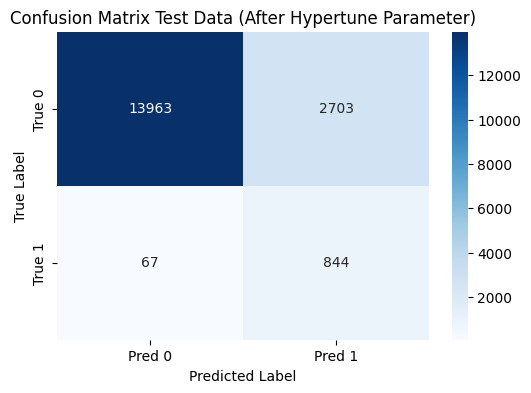

In [ ]:
cm_test_dt=confusion_matrix(y_test, eval_test_dt1)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data (After Hypertune Parameter)')
plt.show()